In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_curve



In [2]:
import numpy as np

In [3]:
fd = pd.read_csv(r"C:\Users\virin\Desktop\creditcard_2023.csv")   
# dataset from https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023?resource=download

In [4]:
fd.head()
#All the features are anonimised to "V" 1- 28, Other colums- ID, Amount, Class

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [5]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [6]:
fd.isnull().sum() 
# No nulls found
# If nulls existed:
# fd.fillna(fd.mean(), inplace=True) # If average value is used to fill nulls, other imputations Median, Mode, or Forward/backward fill (used in timeseries) or,
# ML based imputatiomns like regression, random forest, or other techniques like hotdeck/colddeck or random sampling

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Dividing the dataset to x and y
x = fd.drop(["id",'Class'], axis = 1,errors= 'ignore') # Dropping ID as it is not needed, and Class as it is the value that we are predicting
y = fd['Class'] # As class is the value we are predicting

In [8]:
# To inspect columns included
# print(pd.DataFrame(x.columns)) # or
print(x.columns.tolist())

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [9]:
# Split dataset into training and test sets (use valid variable names)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 
# Splitting data helps in avoiding overfitting and also helps to give unbiased evaluation of the model
# 20% of the whole data is used for testing and 80% for training the model, random_state will help in reproducing 
# the exact results for the model

In [10]:
# Checking the shape
print(x_train.shape)
print(x_test.shape)

(454904, 29)
(113726, 29)


In [11]:
# Feature scaling :  Performed such that each feature will contribute equally to model's learning process, especially, when 
# features are on different scale (Example compare Amt columns = large value, V columns = much smaller values compared)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [12]:
#Checking the class distribution where 0 is not fraud and 1 is fraud:
print(pd.Series(y_train).value_counts(normalize=True))

Class
0    0.500248
1    0.499752
Name: proportion, dtype: float64


In [13]:
# Training model
rf_model = RandomForestClassifier(
    n_estimators= 100,
    max_depth= 10,
    min_samples_split= 5,
    random_state= 42
)

In [14]:
# Using five fold cross validation that split data into five subsets where we
# train the model on 4 folds of it and validates it on the remaining fold
cv_scores = cross_val_score(rf_model, x_train_scaled, y_train, cv=5, scoring='f1')
print('\nCross-validation F1 scores:', cv_scores)
print("Average F1 score:", np.mean(cv_scores))



Cross-validation F1 scores: [0.98470321 0.98650077 0.98473333 0.98425733 0.98384955]
Average F1 score: 0.984808837480464


In [15]:
rf_model.fit(x_train_scaled,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",5
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [16]:
y_pred = rf_model.predict(x_test_scaled)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     56750
           1       1.00      0.97      0.99     56976

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



Precision = TP/TP+FP; Recall(Sensitivity) = TP/TP+FN
F1 Score = Harmonic mean of Precision and recall : 2*(Precision * Recall/Precision + Recall) 
Support -> Number of data points in each of the division

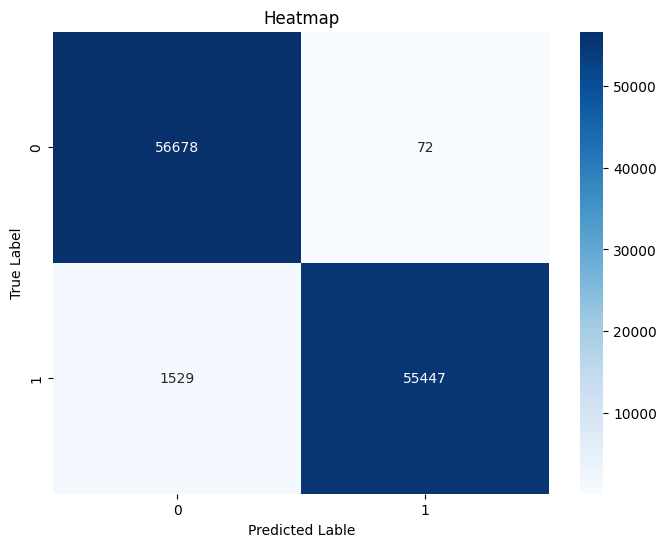

In [17]:
#Plotting on confusion matrix for better understanding
plt.figure(figsize=(8,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt = 'd', cmap='Blues') #As annot is True, we are specifying through 'fmt' which is string formatting code, 
#as to read the values being annotated as integers (d)
plt.title('Heatmap')
plt.ylabel('True Label')
plt.xlabel('Predicted Lable')
plt.show()

56678 - Not fradulent and predicted as such
55447 - Fradulent and predicted as such
72 - Not fraudulet but predicted as fraudulent
1529 - Fraudlent but predicted as not fraudulent

In [18]:
# Feature importance
importance = rf_model.feature_importances_
feature_imp = pd.DataFrame({
    'Feature' : x.columns,
    'Importance' : importance
}).sort_values('Importance', ascending = False)

feature_imp.head(5)

,Feature,Importance
9,V10,0.171750
3,V4,0.159210
13,V14,0.145847
11,V12,0.114395
10,V11,0.089935


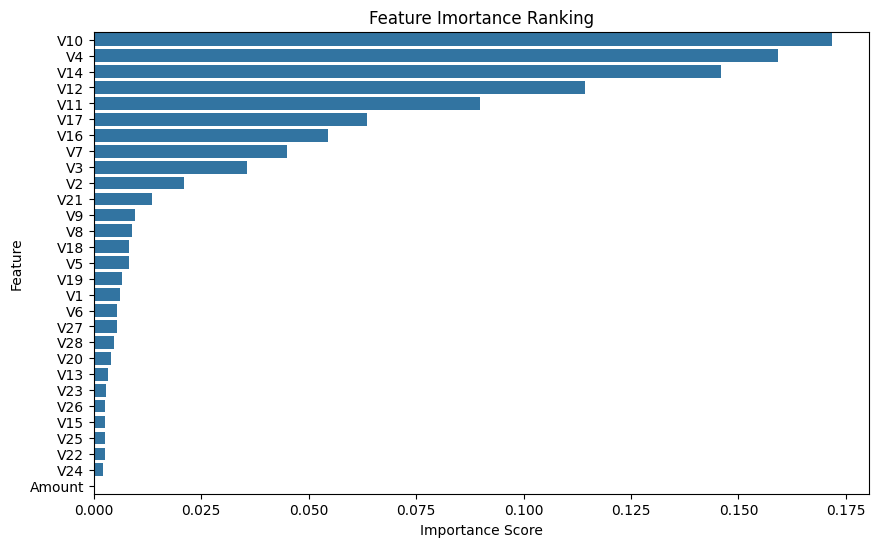

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(data=feature_imp,x='Importance', y='Feature')
plt.title('Feature Imortance Ranking')
plt.xlabel('Importance Score')
#plt.tight_layout()
plt.show()

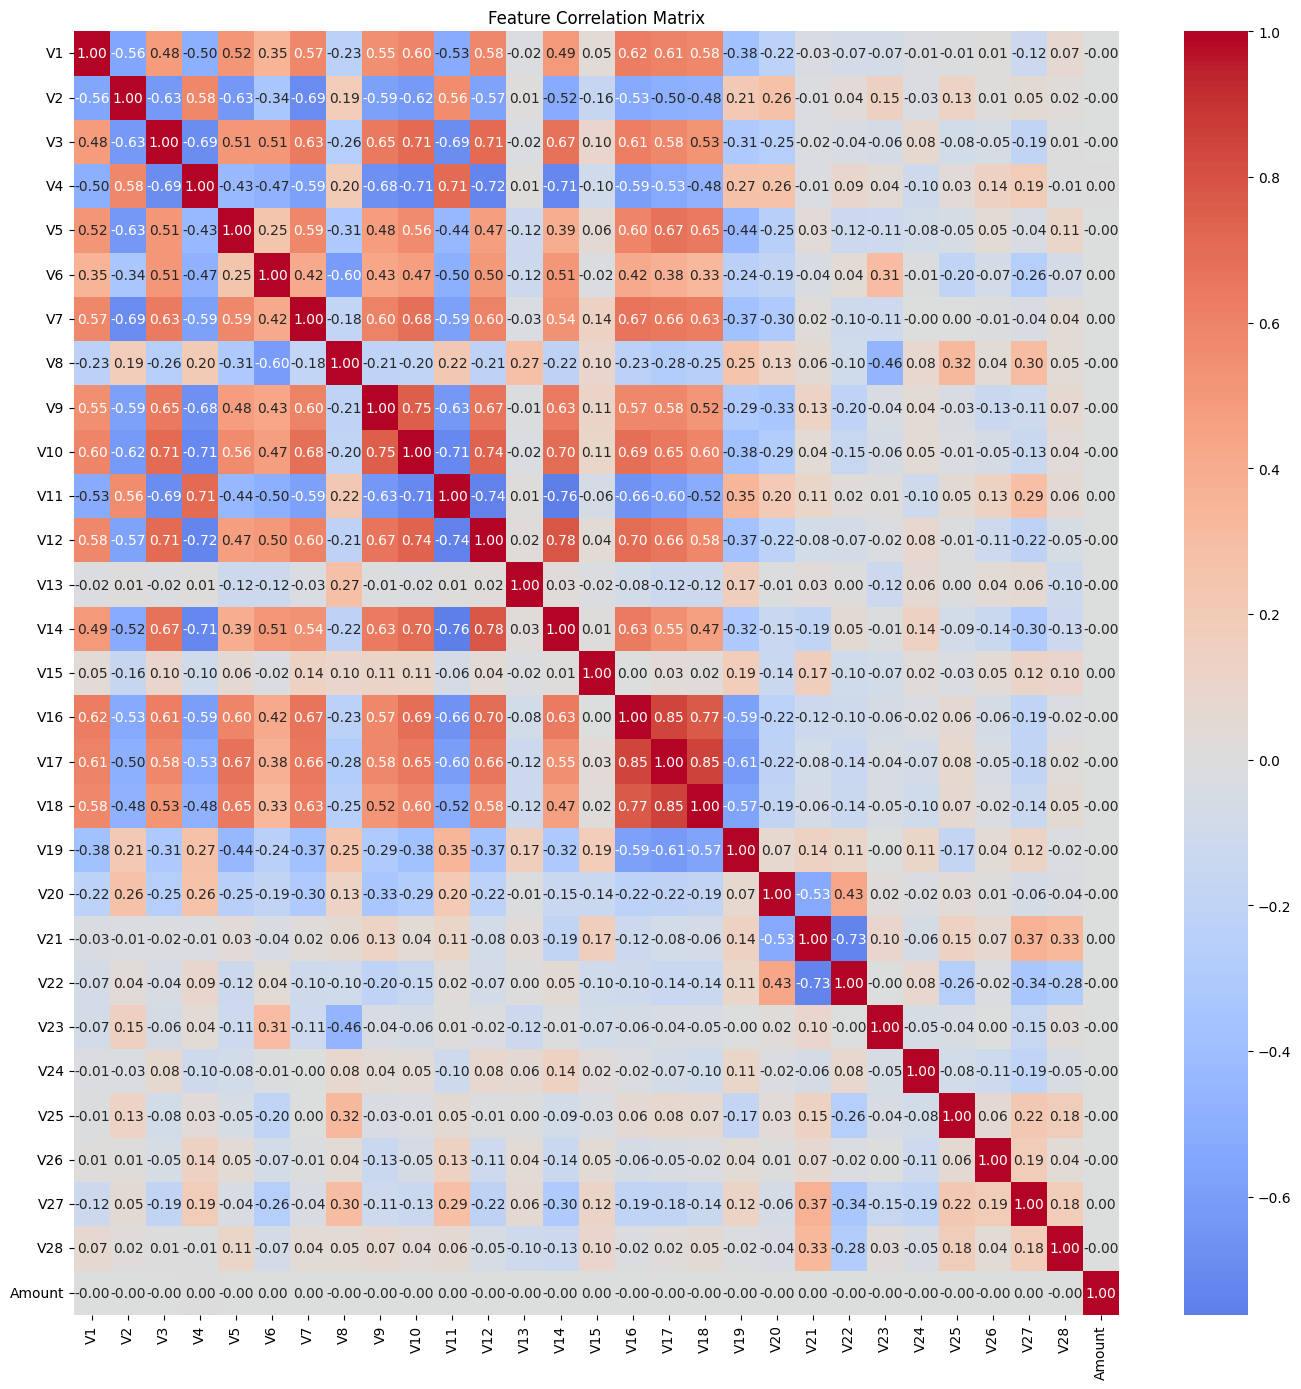

In [27]:
plt.figure(figsize=(14,14))
correlation_matrix = x.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=True, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

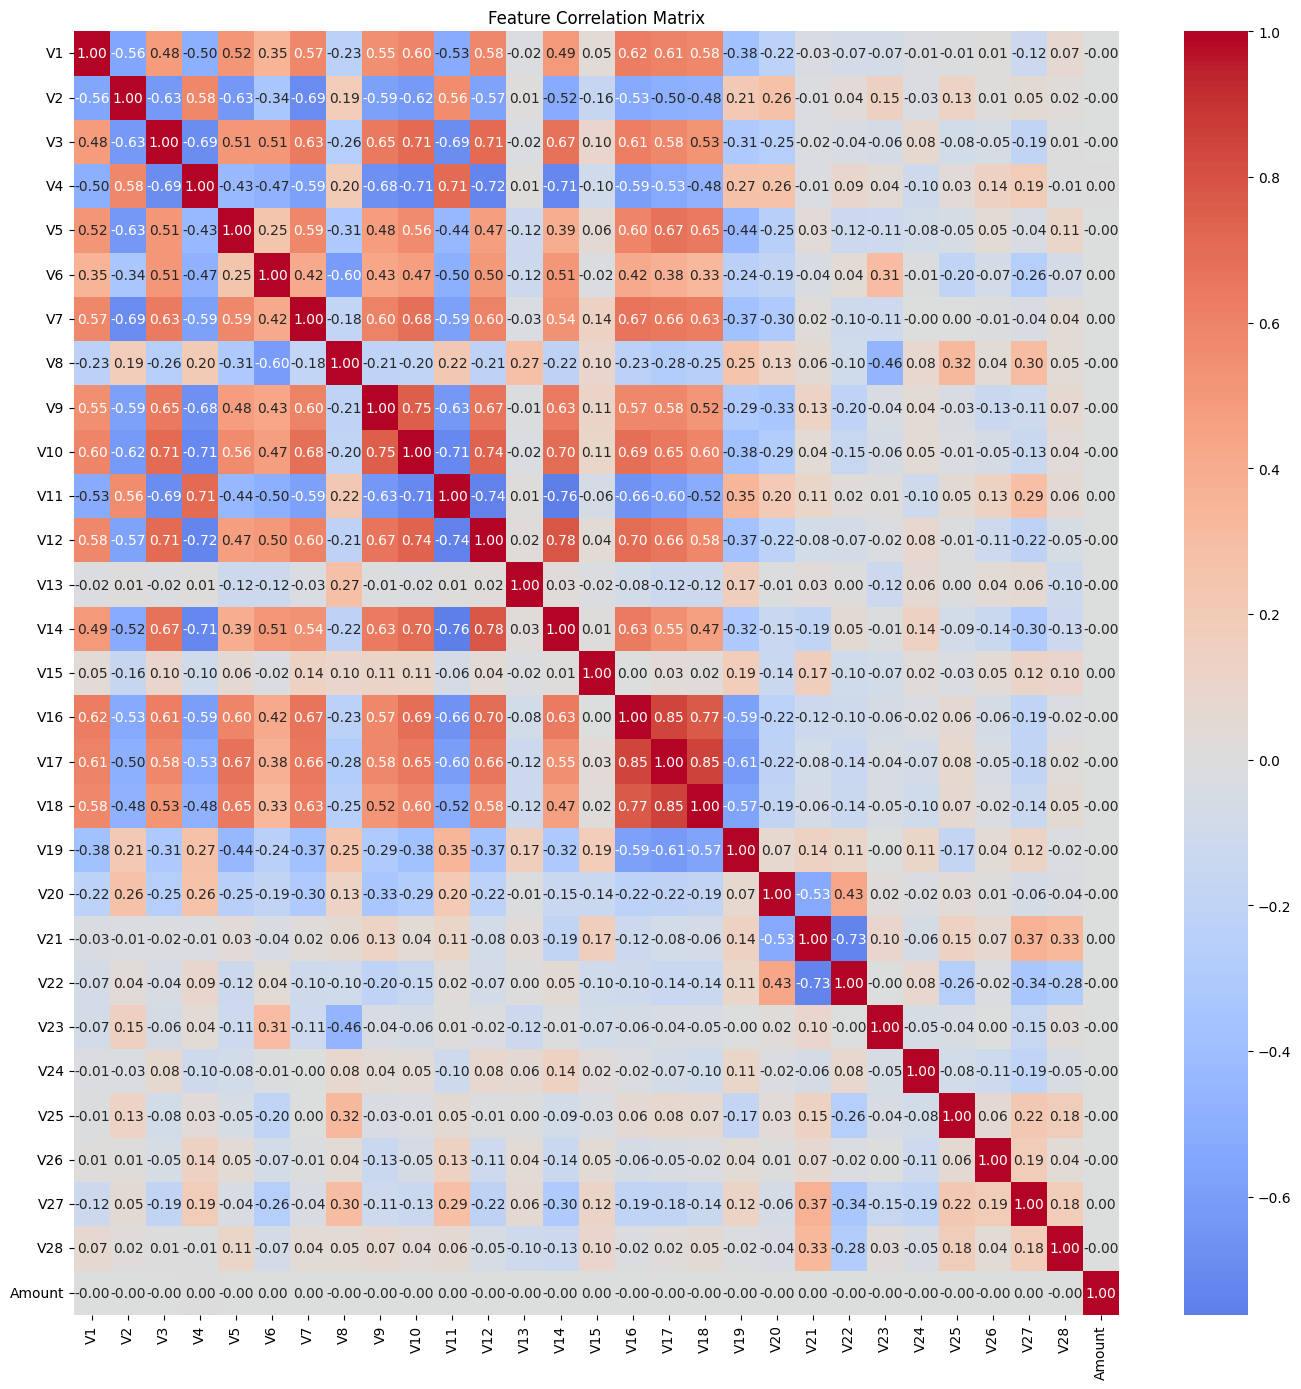

In [ ]:
plt.figure(figsize=(14,14))
correlation_matrix = x.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=True, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

1 is strong positive correlation and -1 is strong negative. We can see only couple of features have greater negative correlation like -0.76 being the highest between V11 and V14.
If there is strong positive correlation between two different features (approx. more than 0.8), they can be treated as redundant features and these cause instability in the model. In such cases you can exclude one of the features and use the other. Strong positive correlation can be observed between the variables - V9 and V10 which lead to redundancy. One of the parameter, if not important, can be dropped. Alternatively, a third parameter can be created which is a combination of both the parameters. This will improve the reliability of the model.

In [21]:
y_pred_proba = rf_model.predict_proba(x_test_scaled)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

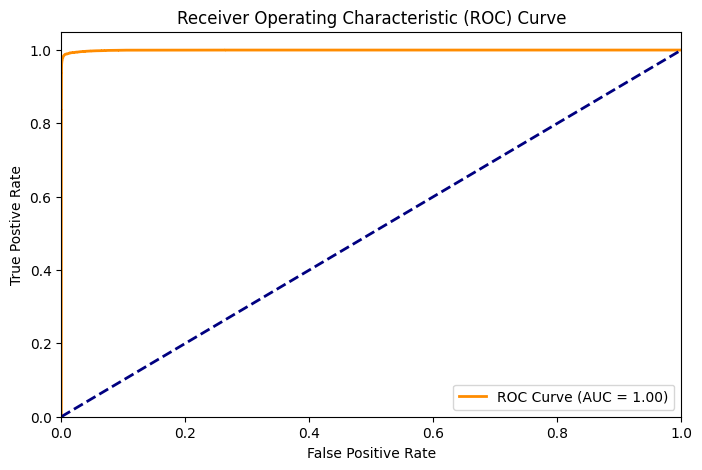

In [24]:
plt.figure(figsize=(8,5))
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color = 'navy', lw=2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = 'lower right')
plt.show()

We can observe that the AUC curve is perfectly 1, which is unusual and doesn't occur in real life. As the dataset is perfectly balanced between 